**1) (10P)**

**In the annealing process the energy state of the quantum chip ...**
1. should remain in the minimum eigenstate (groundstate) 
2. should transform from a higher energy state (excited state) to the groundstate. (x)
3. should tranform from the groundstate to an excited state.

**Make a cross (x) next to the correct answer above.**

Annealing is the process of modelling an optimization problem using the natural tendency of particles to decay into the ground state to solve your problem. This is done by applying a magnetic field which excites the electrons and then they will decay into a ground state which best solves your problem. 
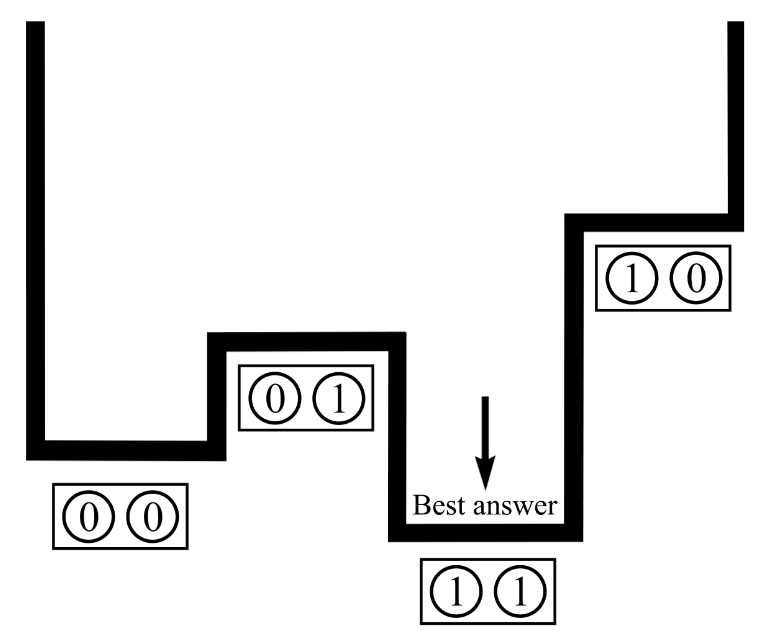

**2) (30P)**

**What is the minimum of the following binary quadratic model E?** 
$$ E(x_1,x_2) = \begin{pmatrix}x_1 & x_2\end{pmatrix} \begin{pmatrix}1 & 2 \\ 0 & 1\end{pmatrix} \begin{pmatrix}x_1 \\ x_2\end{pmatrix} $$

Your answer: The solution is going to be the trivial solution (0,0).

In [95]:
# import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns


from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSolver # classical free optimizer (installed locally on your computer)
from dwave.system import DWaveSampler, EmbeddingComposite # commercial quantum optimizer (in the cloud)

from dimod import BQM # binary quadratic model object

import numpy as np 
import pandas as pd

In [96]:
optimizer = SimulatedAnnealingSampler()
matrix = np.array([[1,2],[0,1]])
bqm = BQM(matrix,'BINARY')
sampleset = optimizer.sample(bqm=bqm, seed=42)
print('solution:', sampleset.first.sample)
print('energy:', sampleset.first.energy)

solution: {0: 0, 1: 0}
energy: 0.0


**3) (30P)**

**You are given a binary quadratic problem to minimize $\min \vec{x}^TQ\vec{x}$, where $Q$ has values $\ge 0$. How can you change the values of the $Q$ matrix such that the minimum solution is NOT the trivial solution and why?**

Your answer: All you have to do is make at least one of the diagonal values negative. Showing this with the previous matrix:

In [97]:
matrix = np.array([[-1,2],[0,1]])
bqm = BQM(matrix,'BINARY')
sampleset = optimizer.sample(bqm=bqm, seed=42)
print('solution:', sampleset.first.sample)
print('energy:', sampleset.first.energy)

solution: {0: 1, 1: 0}
energy: -1.0


**4) (30P)**

**Think about Exercise 3 again: Give an equality constraint for all the variables (drinks), which makes sure, that you will not drink more than three drinks containing alcohol.**

Your answer: What if I dont?

In [98]:
menu = pd.DataFrame({
    'Drink': ['Long Island Ice Tea', 'Mochito', 'Erdbeer Daiquiri', 'Heineken', 'Corona', 'Eristoff Ice', 'Hugo Spritzer', 'Cola', 'Mineralwasser', 'Leitungswasser'],
    'Euro': [5.4, 5.4, 5.4, 3.5, 4, 4, 3.5, 3, 2.5, 0],
    'Score': [100/3, 100/3, 100/3, 100/3, 100/3, 100/3, 100/3, 0, 0, 0]
})
menu

,Drink,Euro,Score
0,Long Island Ice Tea,5.4,33.333333
1,Mochito,5.4,33.333333
2,Erdbeer Daiquiri,5.4,33.333333
3,Heineken,3.5,33.333333
4,Corona,4.0,33.333333
5,Eristoff Ice,4.0,33.333333
6,Hugo Spritzer,3.5,33.333333
7,Cola,3.0,0.000000
8,Mineralwasser,2.5,0.000000
9,Leitungswasser,0.0,0.000000


In [99]:
bqm = BQM('BINARY')
for drink,euro in zip(menu.Drink, menu.Euro):
    bqm.add_variable(drink,euro)
bqm.add_linear_equality_constraint([(drink,score) for drink,score in zip(menu.Drink, menu.Score)],1,-100)
optimizer = SimulatedAnnealingSampler()
sampleset = optimizer.sample(bqm=bqm)
solution = sampleset.first.sample
solution

{'Cola': 0,
 'Corona': 1,
 'Erdbeer Daiquiri': 0,
 'Eristoff Ice': 1,
 'Heineken': 0,
 'Hugo Spritzer': 1,
 'Leitungswasser': 0,
 'Long Island Ice Tea': 0,
 'Mineralwasser': 0,
 'Mochito': 0}

In [100]:
num_alcoholic_beverages = 0
for i,drink in enumerate(solution.values()):
    if drink == 1 and menu.Score[i] > 0:
        num_alcoholic_beverages += drink
num_alcoholic_beverages

3